In [1]:
!pip install scikit-learn==1.1.3 -q

**Цель проекта:** 

**Разработать две модели прогнозирования для отбора коров:**

- **Прогнозирование возможного удоя коровы (целевой признак: Удой).**
- **Определение вероятности получения вкусного молока от коровы (целевой признак: Вкус молока).**

**План работы:**

**1. Загрузка данных**


**2. Предобработка данных**


- **2.1. Анализ пропусков в столбцах, удаление строк с незначительным количеством пропусков.**
- **2.2. Заполнение оставшихся пропусков обоснованными значениями.**
- **2.3. Удаление явных дубликатов.**
- **2.4. Приведение типов данных к нужному формату.**
- **2.5. Обработка категориальных признаков.**
- **2.6. Поиск и устранение неявных дубликатов.**

**3. Исследовательский анализ данных**
- **3.1. Построение графиков признаков для анализа распределений**
- **3.2. Обработка выбросов в данных.**
- **3.3. Изучение взаимосвязей между признаками и целевыми переменными.**

**4. Построение моделей**
- **4.1. Модель линейной регрессии для прогнозирования удоя:**
- **4.2. Отбор наиболее значимых признаков на основе их корреляции с целевой переменной или перебор всех комбинаций признаков с целью выбора модели с наибольшим значением R^2.**
- **4.3. Оценка качества модели с использованием соответствующих метрик.**
- **4.4. Прогнозирование удоя на основе модели.**

- **4.5. Модель логистической регрессии для классификации вкуса молока:**
- **4.6. Анализ ошибок первого и второго рода с целью их минимизации.**
- **4.7. Прогнозирование вкуса молока на основе модели.**

**5. Итоговые выводы**
- **Подведение итогов проведенного исследования и выводы на основе полученных результатов.**

## Шаг 1. Загрузка данных

In [2]:
# Импортируем библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from math import sqrt

from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score
)

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

## Шаг 2. Предобработка данных

In [4]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [5]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

**Пропусков нет, но есть не корректные типы столбцов, а также нужно изменить длинные названия столбцов**

In [6]:
# Изменим название столбцов
ferma_main.columns = ['id', 'Удой, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Порода', 'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%', 'Вкус молока', 'Возраст']


In [7]:
# Преобразуем столбцы к числовым типам 
for col in ['ЭКЕ', 'СПО', 'Жирность,%', 'Белок,%']:
    if ferma_main[col].dtype == 'object':
        ferma_main[col] = ferma_main[col].str.replace(',', '.').astype(float)
    else:
        ferma_main[col] = ferma_main[col].astype(float)
        
        
ferma_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   Удой, кг          634 non-null    int64  
 2   ЭКЕ               634 non-null    float64
 3   Сырой протеин, г  634 non-null    int64  
 4   СПО               634 non-null    float64
 5   Порода            634 non-null    object 
 6   Тип пастбища      634 non-null    object 
 7   порода папы_быка  634 non-null    object 
 8   Жирность,%        634 non-null    float64
 9   Белок,%           634 non-null    float64
 10  Вкус молока       634 non-null    object 
 11  Возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [8]:
cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Вкус молока', 'Возраст']

# Примененяем очистку к каждому столбцу
for col in cols:
    ferma_main[col] = ferma_main[col].str.lower()       # Приводим к нижнему регистру
    ferma_main[col] = ferma_main[col].str.replace('_', '')  # Удаляем нижнеее подчеркивание
    ferma_main[col] = ferma_main[col].str.replace('"', '')  # Удаляем кавычки
    ferma_main[col] = ferma_main[col].str.replace(' - ', '-')  # Удаляем пробелы рядом с дефисом
    ferma_main[col] = ferma_main[col].str.replace(' ', '')  # Удаляем все пробелы
    ferma_main[col] = ferma_main[col].str.strip()       # Удаляем пробелы в начале и конце строки

In [9]:
ferma_main['Порода'].unique()

array(['висбикайдиал', 'рефлешнсоверинг'], dtype=object)

In [10]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].str.replace('равнинные','равнинное')
ferma_main['Тип пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [11]:
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].str.replace('айдиалл','айдиал')
ferma_main['порода папы_быка'].unique()

array(['айдиал', 'соверин'], dtype=object)

In [12]:
ferma_main['Вкус молока'].unique()

array(['вкусно', 'невкусно'], dtype=object)

In [13]:
ferma_main['Возраст'].unique()

array(['более2лет', 'менее2лет'], dtype=object)

**Переходим к следующему датафрейму**

In [14]:
ferma_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [15]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**Пропусков нет, и не корректных типов столбцов тоже**

In [16]:
cols = ['Имя Папы']

# Примененяем очистку к каждому столбцу
for col in cols:
    ferma_dad[col] = ferma_dad[col].str.lower()
    ferma_dad[col] = ferma_dad[col].str.replace('_', '')
    ferma_dad[col] = ferma_dad[col].str.replace('"', '')
    ferma_dad[col] = ferma_dad[col].str.replace(' - ', '-')
    ferma_dad[col] = ferma_dad[col].str.replace(' ', '')
    ferma_dad[col] = ferma_dad[col].str.strip()
    
    
for col in cols:
    print(f"Уникальные значения в столбце '{col}': {ferma_dad[col].unique()}")

Уникальные значения в столбце 'Имя Папы': ['буйный' 'соловчик' 'барин' 'геркулес']


**Переходим к следующему датафрейму**

In [17]:
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [18]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


**Пропусков нет, но есть не корректные типы стобцов, а также можем изменить названия некоторых столбцов**

In [19]:
# Изменим название столбцов
cow_buy.columns = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы', 'Текущая_жирность,%', 'Текущий_белок,%', 'Возраст']


# Преобразуем столбцы к числовым типам 
for col in ['Текущая_жирность,%', 'Текущий_белок,%']:
    if cow_buy[col].dtype == 'object':
        cow_buy[col] = cow_buy[col].str.replace(',', '.').astype(float)
    else:
        cow_buy[col] = cow_buy[col].astype(float)
        
        
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Порода              20 non-null     object 
 1   Тип пастбища        20 non-null     object 
 2   порода папы_быка    20 non-null     object 
 3   Имя_папы            20 non-null     object 
 4   Текущая_жирность,%  20 non-null     float64
 5   Текущий_белок,%     20 non-null     float64
 6   Возраст             20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [20]:
cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы', 'Возраст']


# Применяем очистку к каждому столбцу
for col in cols:
    cow_buy[col] = cow_buy[col].str.lower()
    cow_buy[col] = cow_buy[col].str.replace('_', '')
    cow_buy[col] = cow_buy[col].str.replace('"', '')
    cow_buy[col] = cow_buy[col].str.replace(' - ', '-')
    cow_buy[col] = cow_buy[col].str.replace(' ', '')
    cow_buy[col] = cow_buy[col].str.strip()
    
    
for col in cols:
    print(f"Уникальные значения в столбце '{col}': {cow_buy[col].unique()}")

Уникальные значения в столбце 'Порода': ['висбикайдиал' 'рефлешнсоверинг']
Уникальные значения в столбце 'Тип пастбища': ['холмистое' 'равнинное']
Уникальные значения в столбце 'порода папы_быка': ['айдиал' 'соверин']
Уникальные значения в столбце 'Имя_папы': ['геркулес' 'буйный' 'барин' 'соловчик']
Уникальные значения в столбце 'Возраст': ['более2лет' 'менее2лет']


**Перейдем к очистке от дубликатов**

In [21]:
ferma_main.info()

ferma_main.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   Удой, кг          634 non-null    int64  
 2   ЭКЕ               634 non-null    float64
 3   Сырой протеин, г  634 non-null    int64  
 4   СПО               634 non-null    float64
 5   Порода            634 non-null    object 
 6   Тип пастбища      634 non-null    object 
 7   порода папы_быка  634 non-null    object 
 8   Жирность,%        634 non-null    float64
 9   Белок,%           634 non-null    float64
 10  Вкус молока       634 non-null    object 
 11  Возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


5

In [22]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)


ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   Удой, кг          629 non-null    int64  
 2   ЭКЕ               629 non-null    float64
 3   Сырой протеин, г  629 non-null    int64  
 4   СПО               629 non-null    float64
 5   Порода            629 non-null    object 
 6   Тип пастбища      629 non-null    object 
 7   порода папы_быка  629 non-null    object 
 8   Жирность,%        629 non-null    float64
 9   Белок,%           629 non-null    float64
 10  Вкус молока       629 non-null    object 
 11  Возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


In [23]:
ferma_dad.duplicated().sum()

0

**Явных дубликатов нет**

In [24]:
cow_buy.info()

cow_buy.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Порода              20 non-null     object 
 1   Тип пастбища        20 non-null     object 
 2   порода папы_быка    20 non-null     object 
 3   Имя_папы            20 non-null     object 
 4   Текущая_жирность,%  20 non-null     float64
 5   Текущий_белок,%     20 non-null     float64
 6   Возраст             20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


4

In [25]:
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)

cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Порода              16 non-null     object 
 1   Тип пастбища        16 non-null     object 
 2   порода папы_быка    16 non-null     object 
 3   Имя_папы            16 non-null     object 
 4   Текущая_жирность,%  16 non-null     float64
 5   Текущий_белок,%     16 non-null     float64
 6   Возраст             16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


## Исследовательский анализ данных

In [26]:
# Посмотрим на количественные данные
ferma_main.describe()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,"Жирность,%","Белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


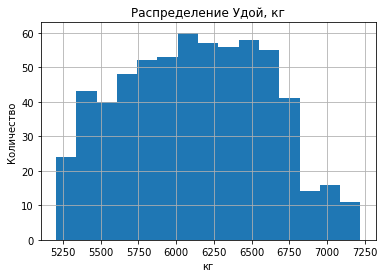

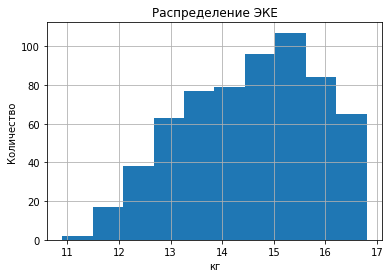

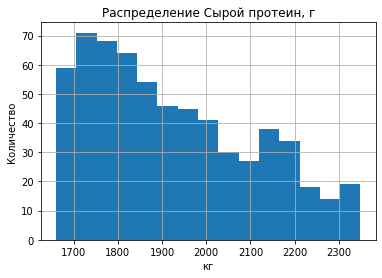

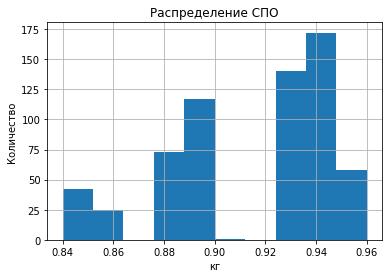

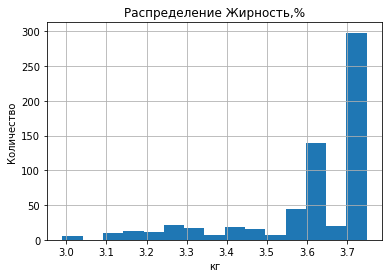

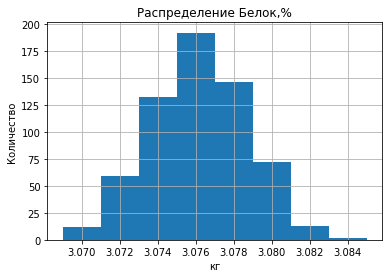

In [27]:
# на графике был обнаружен выброс на значении 45000 кг, фильтруем его для исключения
ferma_main = ferma_main[ferma_main['Удой, кг'] < 45000]


# Список столбцов с количественными знчениями
numerical_cols = ['Удой, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Жирность,%', 'Белок,%']

# Словарь с параметрами bins для каждого столбца
bins_dict = {
    'Удой, кг': 15,
    'ЭКЕ': 10,
    'Сырой протеин, г': 15,
    'СПО': 10,
    'Жирность,%': 15,
    'Белок,%': 8
}

# Цикл для создания гистограмм 
for col in numerical_cols:
    ferma_main[col].hist(bins=bins_dict[col])
    plt.title(f'Распределение {col}')
    plt.xlabel('кг')
    plt.ylabel('Количество')
    plt.show()

**По графикам можно сделать выводы:**
- Распределение удоя имеет нормальное распределение.
- Распределение ЭКЕ также носит нормальный характер смещенное влево.
- Распределение сырого протеина имеет нормальное распределение смещенное вправо.
- Распределение СПО имеет мультимодальное распределение, с несколькими пиками.
- Распределение жирности имет бимодальное распределние с двумя пиками около значений 3.6 и 3.7
- Распределение белка имеет нормальное распределение с одним выраженным пиком.

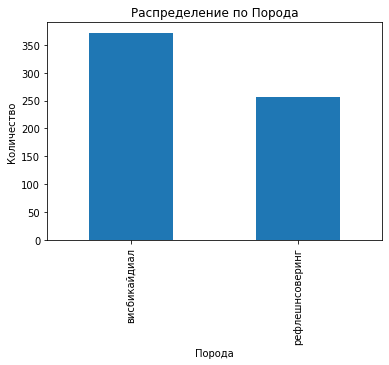

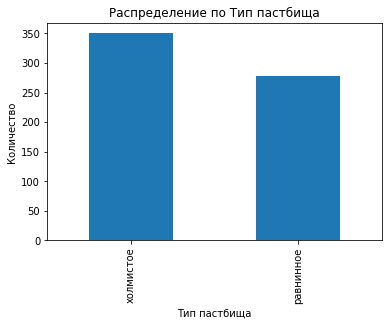

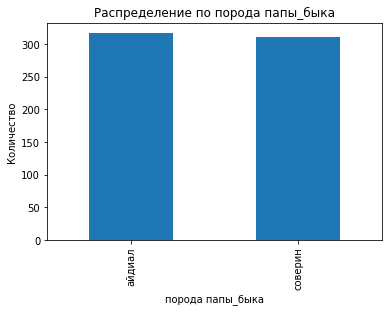

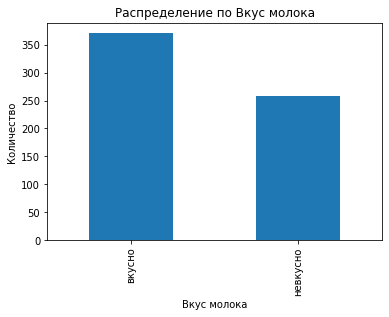

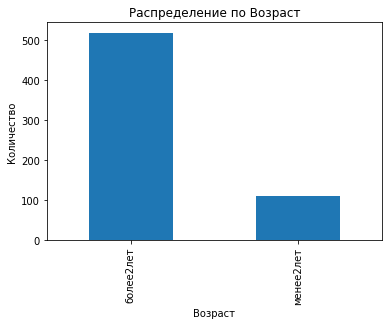

In [28]:
# Список столбцов с категориальными признаками
categorical_cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Вкус молока', 'Возраст']

# Цикл для создания графиков
for col in categorical_cols:
    ax = ferma_main[col].value_counts().plot.bar()
    plt.title(f'Распределение по {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

## Корреляционный анализ

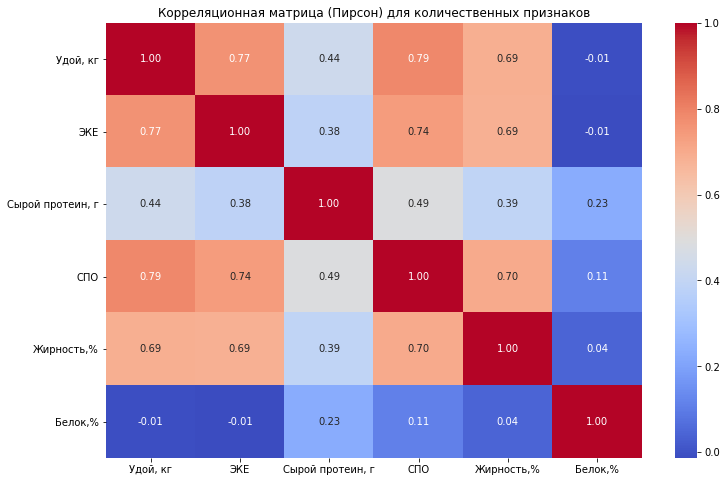

In [29]:
# Список столбцов с количественными значениями
numerical_cols = ['Удой, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Жирность,%', 'Белок,%']

# Построение корреляционной матрицы Пирсона для количественных признаков
correlation_matrix = ferma_main[numerical_cols].corr(method='spearman')

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица (Пирсон) для количественных признаков')
plt.show()

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Если выше мы заметили, что не все признаки распределены нормально, то здесь нужно использовать корреляцию Спирмана или Phik или иные подходы, которые устойчивы к выбросам и ненормальному распределению. Корреляция Пирсона нам не подходит.

`corr(method='spearman')` - так можно измерить корреляцию Спирмана.




</div>
  


**На основе корреляционной матрицы можно сделать следующие выводы:**

**1. Сильные корреляции:**

- **Удой и СПО (0.81).**
- **Удой и ЭКЕ (0.77).**
- **ЭКЕ и СПО (0.75).**

**2.Умеренные корреляции:**

- **Жирность и ЭКЕ (0.64).**
- **Жирность и СПО (0.63).**
- **Удой и Жирность (0.60).**

**3. Слабые или отсутствующие корреляции:**

- **Белок практически не коррелирует с другими признаками.**

In [30]:
# Создадим функцию для построения графиков
def plot_scatter(data, x, y, hue, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    plt.grid(True)
    plt.show()

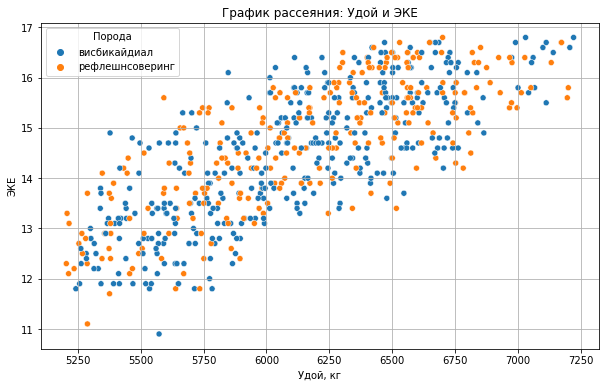

In [31]:
plot_scatter(ferma_main, 'Удой, кг', 'ЭКЕ', 'Порода', 'График рассеяния: Удой и ЭКЕ')

**График показывает положительную корреляцию между удоем и ЭКЕ для обеих пород. Это подтверждается также корреляционной матрицей, где корреляция между удоем и ЭКЕ высокая (0.77)**

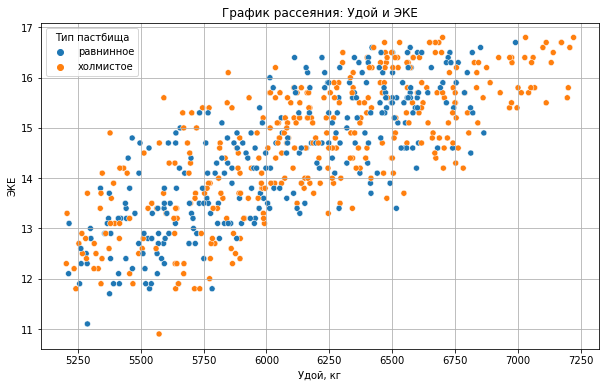

In [32]:
plot_scatter(ferma_main, 'Удой, кг', 'ЭКЕ', 'Тип пастбища', 'График рассеяния: Удой и ЭКЕ')

**Оба типа пастбища показывают похожее распределение по удою и ЭКЕ, что может указывать на то, что тип пастбища не оказывает значительного влияния на эти показатели. А также здесь тоже видно что увеличение удоя обычно сопровождается увеличением ЭКЕ.**

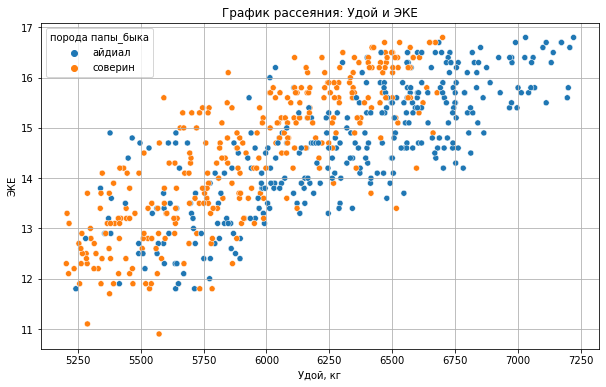

In [33]:
plot_scatter(ferma_main, 'Удой, кг', 'ЭКЕ', 'порода папы_быка', 'График рассеяния: Удой и ЭКЕ')

**На графике видно, что между удоем и ЭКЕ существует положительная корреляция для обеих пород айдиал и соверин. Порода соверин показывает более высокие значения ЭКЕ при аналогичных значениях удоя, по сравнению с породой айдиал.**

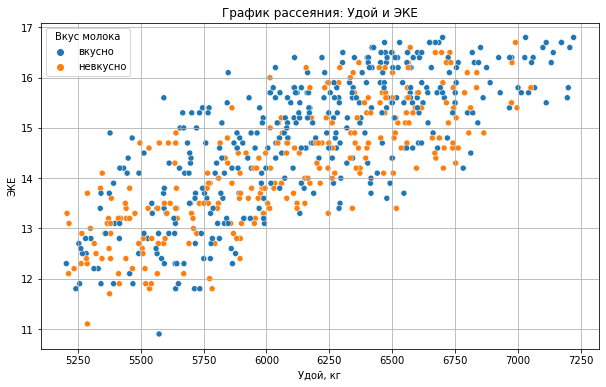

In [34]:
plot_scatter(ferma_main, 'Удой, кг', 'ЭКЕ', 'Вкус молока', 'График рассеяния: Удой и ЭКЕ')

**Оба типа вкуса молока показывают равномерное распределение по удою и ЭКЕ, что указывает на то, что вкус молока не оказывает значительного влияния на удой и ЭКЕ и наоборот.**

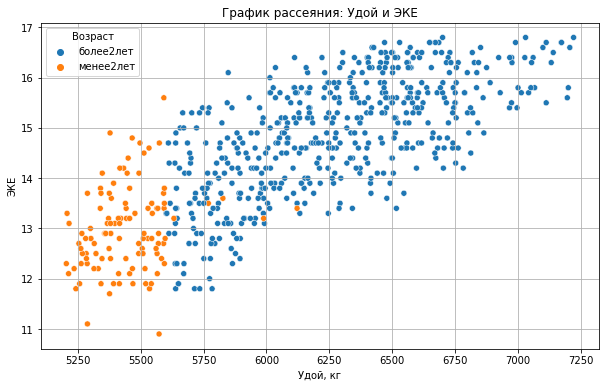

In [35]:
plot_scatter(ferma_main, 'Удой, кг', 'ЭКЕ', 'Возраст', 'График рассеяния: Удой и ЭКЕ')

- **Коровы менее 2 лет имеют более низкие значения удоя и ЭКЕ, сконцентрированны в нижней части графика.**


- **Коровы более 2 лет имеют более высокие значения удоя и ЭКЕ, распределенные по всему диапазону графика.**

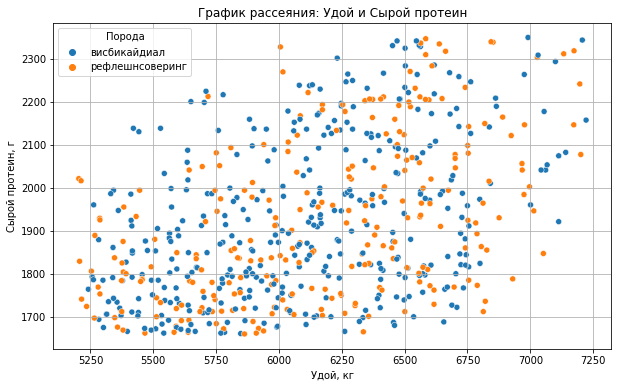

In [36]:
plot_scatter(ferma_main, 'Удой, кг', 'Сырой протеин, г', 'Порода', 'График рассеяния: Удой и Сырой протеин')

**Отсутствие явной корреляции. На графике мы не наблюдаем явной корреляции между удоем и сырым протеином. Точки распределены случайным образом.**

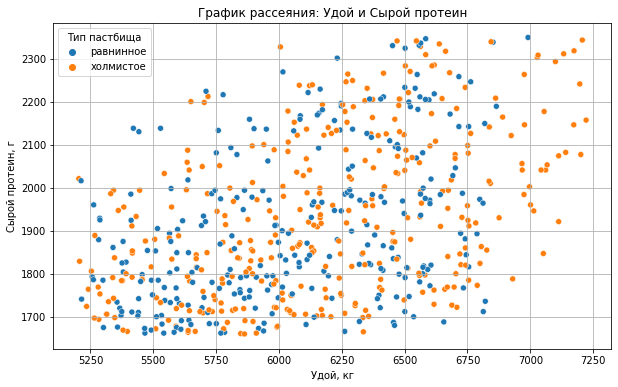

In [37]:
plot_scatter(ferma_main, 'Удой, кг', 'Сырой протеин, г', 'Тип пастбища', 'График рассеяния: Удой и Сырой протеин')

**Значительных различий в распределении удоя и сырого протеина в зависимости от типа пастбища - нет.**

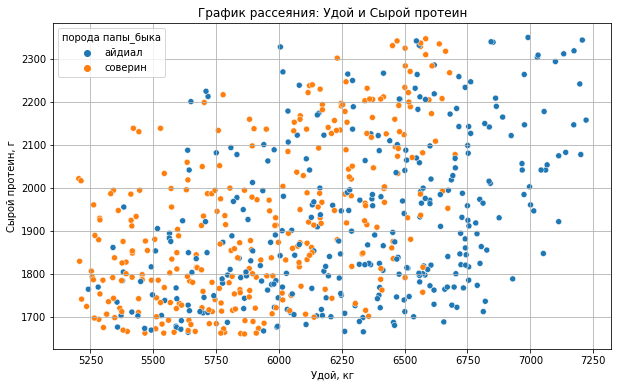

In [38]:
plot_scatter(ferma_main, 'Удой, кг', 'Сырой протеин, г', 'порода папы_быка', 'График рассеяния: Удой и Сырой протеин')

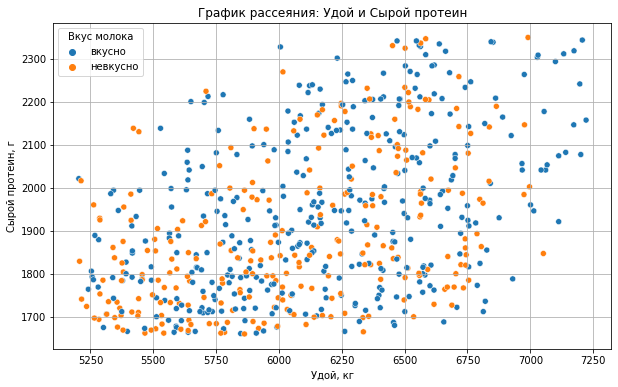

In [39]:
plot_scatter(ferma_main, 'Удой, кг', 'Сырой протеин, г', 'Вкус молока', 'График рассеяния: Удой и Сырой протеин')


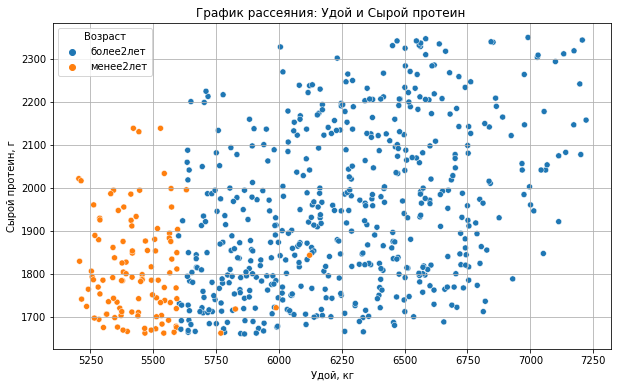

In [40]:
plot_scatter(ferma_main, 'Удой, кг', 'Сырой протеин, г', 'Возраст', 'График рассеяния: Удой и Сырой протеин ')

**Коровы менее 2 лет имеют более низкие значения удоя и сырого протеина по сравнению с коровами старше 2 лет.**

**Взаимосвязь между содержанием сырого протеина и удоем существует, хотя и очень мала. В то же время, нет взаимосвязи между содержанием протеина и категориальными переменными.**

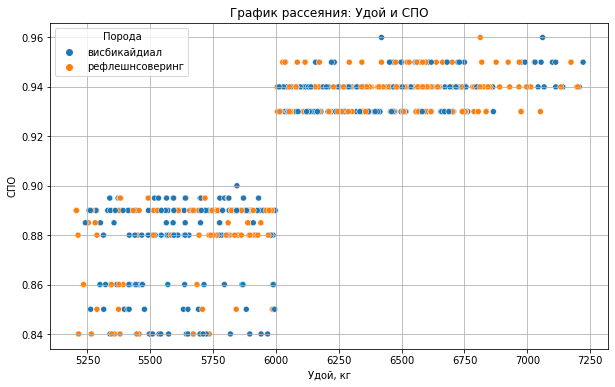

In [41]:
plot_scatter(ferma_main, 'Удой, кг', 'СПО', 'Порода', 'График рассеяния: Удой и СПО')

**Обе породы распределены по всем уровням СПО, что указывает на то, что порода не оказывает значительного влияния на СПО.**

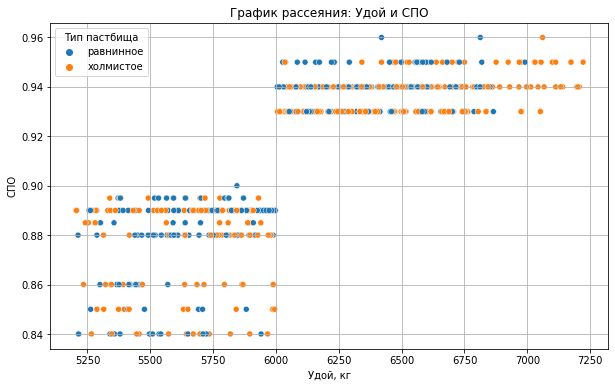

In [42]:
plot_scatter(ferma_main, 'Удой, кг', 'СПО', 'Тип пастбища', 'График рассеяния: Удой и СПО')

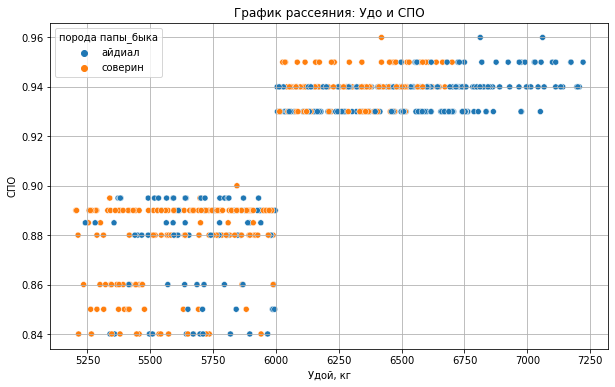

In [43]:
plot_scatter(ferma_main, 'Удой, кг', 'СПО', 'порода папы_быка', 'График рассеяния: Удо и СПО')

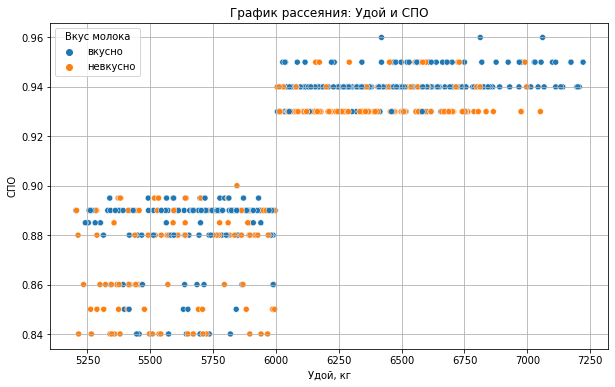

In [44]:
plot_scatter(ferma_main, 'Удой, кг', 'СПО', 'Вкус молока', 'График рассеяния: Удой и СПО')

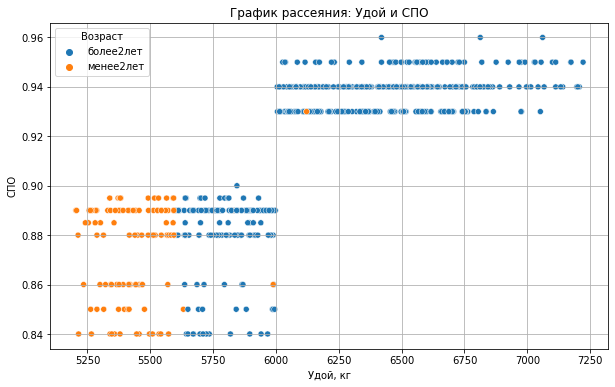

In [45]:
plot_scatter(ferma_main, 'Удой, кг', 'СПО', 'Возраст', 'График рассеяния: Удой и СПО')

**Ни один из признаков (порода, тип пастбища, порода папы быка, вкус молока, возраст) не показывает сильного влияния на распределение СПО или удоя. Все категориальные признаки имеют сходное распределение значений СПО при аналогичных значениях удоя.  Значения удоя варьируются в большом диапазоне для каждого уровня СПО. Это указывает на то, что внешние условия не сильно влияют на взаимосвязь между удоем и СПО.**

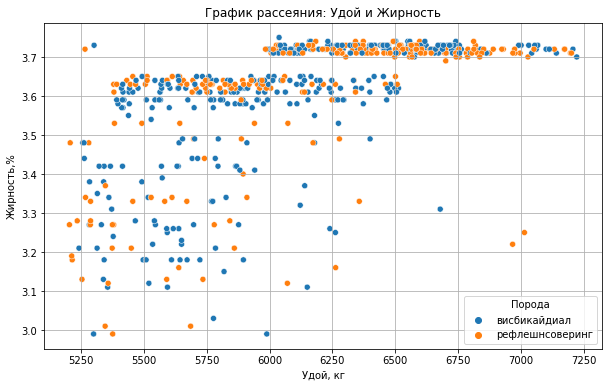

In [46]:
plot_scatter(ferma_main, 'Удой, кг', 'Жирность,%', 'Порода', 'График рассеяния: Удой и Жирность')

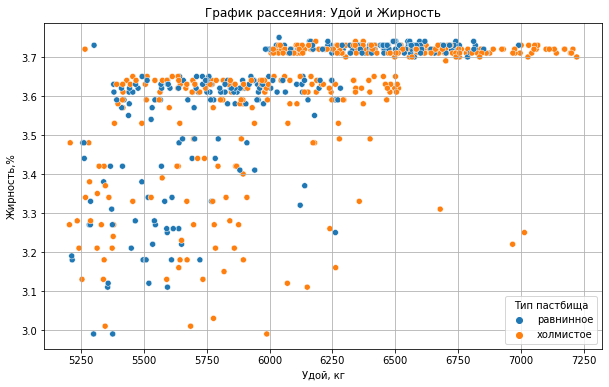

In [47]:
plot_scatter(ferma_main, 'Удой, кг', 'Жирность,%', 'Тип пастбища', 'График рассеяния: Удой и Жирность')

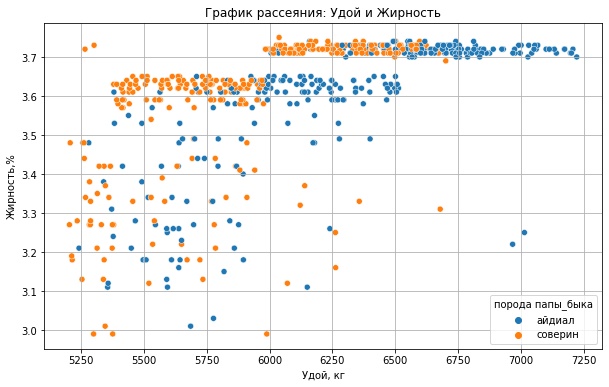

In [48]:
plot_scatter(ferma_main, 'Удой, кг', 'Жирность,%', 'порода папы_быка', 'График рассеяния: Удой и Жирность')

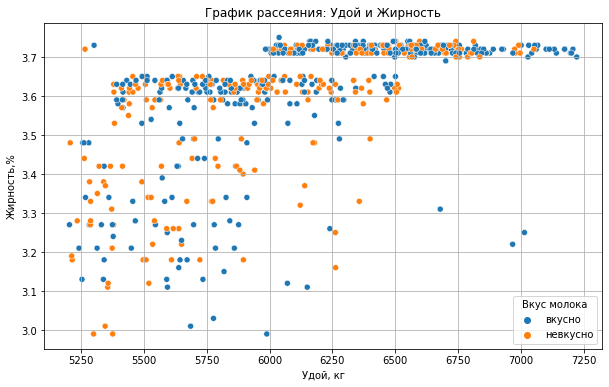

In [49]:
plot_scatter(ferma_main, 'Удой, кг', 'Жирность,%', 'Вкус молока', 'График рассеяния: Удой и Жирность')

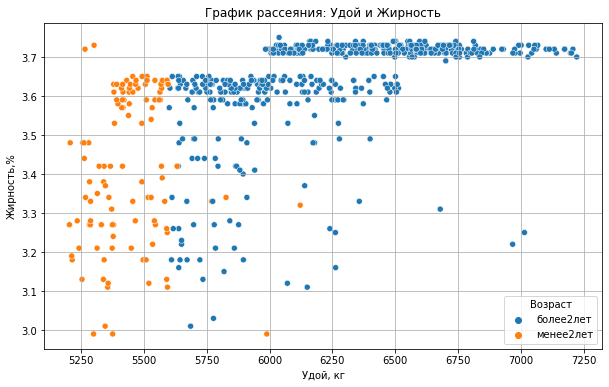

In [50]:
plot_scatter(ferma_main, 'Удой, кг', 'Жирность,%', 'Возраст', 'График рассеяния: Удой и Жирность')

**Молоко по жирности можно разделить на две группы: 3.6 и 3.7. В целом, можно сказать, что более высокая жирность приводит к большему удою.**

**Также видно, что порода отца коровы имеет значение: быки породы Айдиал более чувствительно к изменениям удоя в зависимости от жирности, чем быки породы Соверин.**

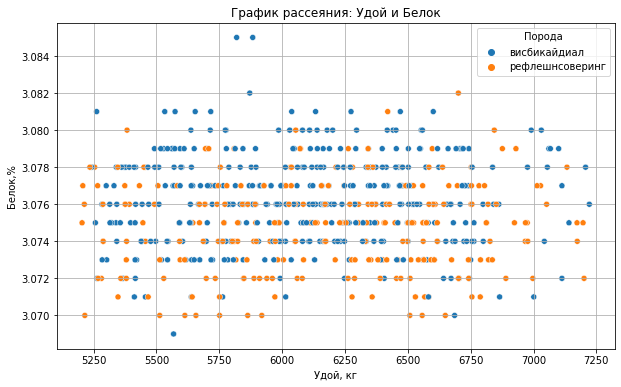

In [51]:
plot_scatter(ferma_main, 'Удой, кг', 'Белок,%', 'Порода', 'График рассеяния: Удой и Белок')

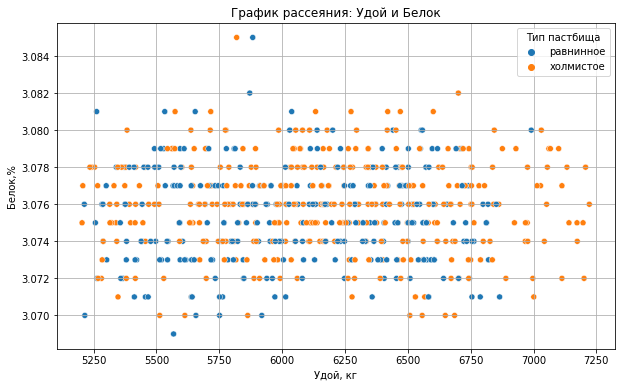

In [52]:
plot_scatter(ferma_main, 'Удой, кг', 'Белок,%', 'Тип пастбища', 'График рассеяния: Удой и Белок')


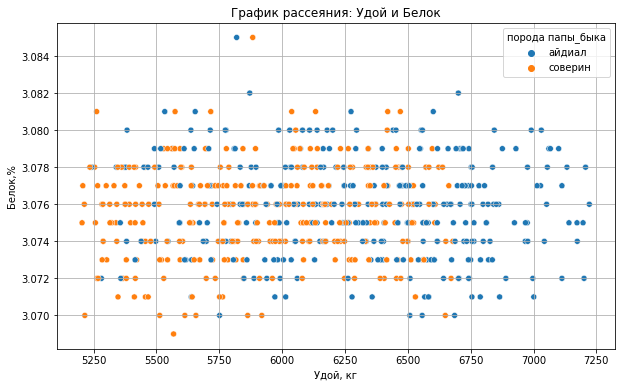

In [53]:
plot_scatter(ferma_main, 'Удой, кг', 'Белок,%', 'порода папы_быка', 'График рассеяния: Удой и Белок')

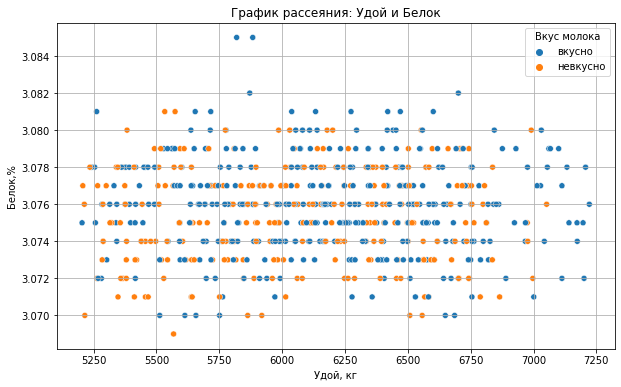

In [54]:
plot_scatter(ferma_main, 'Удой, кг', 'Белок,%', 'Вкус молока', 'График рассеяния: Удой и Белок')

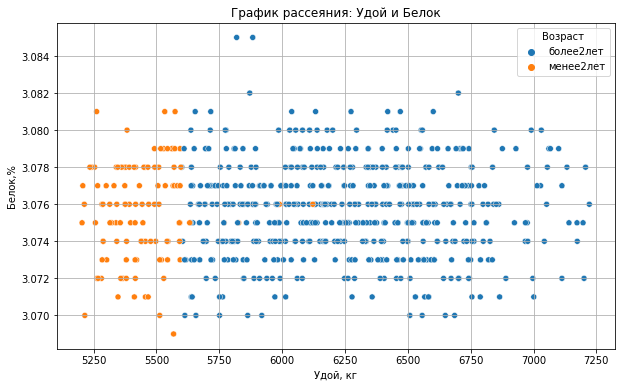

In [55]:
plot_scatter(ferma_main, 'Удой, кг', 'Белок,%', 'Возраст', 'График рассеяния: Удой и Белок')

**Значимой корреляции между удоем и содержанием белка - нет. Значения белка распределены случайным образом по всему диапазону значений удоя, что говорит о слабой или отсутствующей зависимости.**

**На основании проведенного анализа можно сделать следующие выводы:**

- **Белок практически не влияет на удой, поэтому его можно исключить из модели.**

- **ЭКЕ показывает сильную линейную зависимость с удоем и должен быть включен в модель.**

- **Протеин имеет слабую и нелинейную связь с удоем, но считаю его можно учитывать.**

- **Жирность и СПО демонстрируют нелинейную зависимость с удоем, но их использование в модели оправдано, несмотря на ненормальное распределение.**

**Мультиколлинеарность между признаками не наблюдается, максимальная корреляция зафиксирована между СПО и ЭКЕ и составляет 0,81. Для построения модели целесообразно взять следующие признаки: ЭКЕ, Протеин, СПО, а такж
е категориальные признаки: Порода, тип пастбища, порода папы_быка и возраст.**

## Обучение модели линейной регрессии

In [56]:
# Создадим новый DataFrame и скопируем все столбцы из ferma_main
df = ferma_main.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   Удой, кг          628 non-null    int64  
 2   ЭКЕ               628 non-null    float64
 3   Сырой протеин, г  628 non-null    int64  
 4   СПО               628 non-null    float64
 5   Порода            628 non-null    object 
 6   Тип пастбища      628 non-null    object 
 7   порода папы_быка  628 non-null    object 
 8   Жирность,%        628 non-null    float64
 9   Белок,%           628 non-null    float64
 10  Вкус молока       628 non-null    object 
 11  Возраст           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


In [57]:
RANDOM_STATE = 42

X = df.drop('Удой, кг', axis=1)
y = df['Удой, кг']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 508 to 103
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                471 non-null    int64  
 1   ЭКЕ               471 non-null    float64
 2   Сырой протеин, г  471 non-null    int64  
 3   СПО               471 non-null    float64
 4   Порода            471 non-null    object 
 5   Тип пастбища      471 non-null    object 
 6   порода папы_быка  471 non-null    object 
 7   Жирность,%        471 non-null    float64
 8   Белок,%           471 non-null    float64
 9   Вкус молока       471 non-null    object 
 10  Возраст           471 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 44.2+ KB


In [58]:
num_cols = ['ЭКЕ', 'Сырой протеин, г', 'СПО']
cat_cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']

In [59]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols])
X_test_ohe = encoder.transform(X_test[cat_cols])

encoder_cols = encoder.get_feature_names_out()
encoder_cols

array(['Порода_рефлешнсоверинг', 'Тип пастбища_холмистое',
       'порода папы_быка_соверин', 'Возраст_менее2лет'], dtype=object)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [61]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_cols)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_cols)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [62]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

In [63]:
r2 = r2_score(y_test, predictions_lr)  
r2

0.7844078173416967

In [64]:
# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# Выводим метрики
def print_metrics(model_name, mse, mae, rmse):
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

In [65]:
# Оценка первой модели
mse_1, mae_1, rmse_1 = calculate_metrics(y_test, predictions_lr)
print_metrics("Model 1", mse_1, mae_1, rmse_1)

Model 1 - MSE: 43887.02, MAE: 164.24, RMSE: 209.49


In [66]:
residuals = y_test - predictions_lr

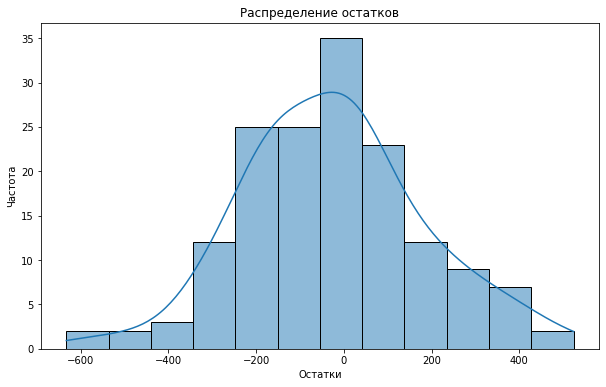

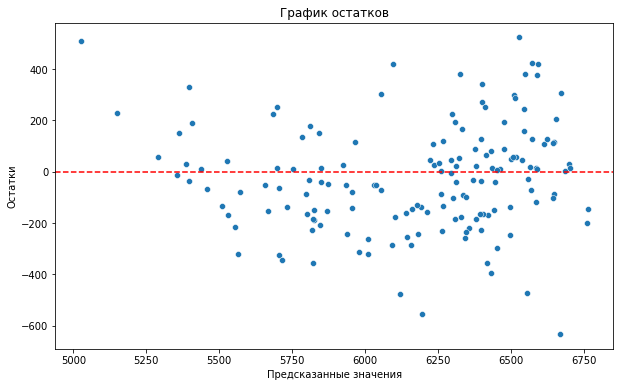

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

**Модель показывает среднюю предсказательную способность с коэффициентом детерминации 0,784. Распределение остатков близко к нормальному и практически не имеет смещения, что говорит о том, что модель делает адекватные прогнозы относительно реального объема удоя. Распределение остатков также указывает на постоянный характер разброса. Для улучшения качества модели можно преобразовать признак СПО в категориальный и добавить  ЭКЕ в квадрате как новый признак.**

## Обучение второй модели линейной регрессии

In [68]:
df = ferma_main.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   Удой, кг          628 non-null    int64  
 2   ЭКЕ               628 non-null    float64
 3   Сырой протеин, г  628 non-null    int64  
 4   СПО               628 non-null    float64
 5   Порода            628 non-null    object 
 6   Тип пастбища      628 non-null    object 
 7   порода папы_быка  628 non-null    object 
 8   Жирность,%        628 non-null    float64
 9   Белок,%           628 non-null    float64
 10  Вкус молока       628 non-null    object 
 11  Возраст           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


In [69]:
# Преобразование СПО в категориальный признак
df.loc[df['СПО'] < 0.92, 'СПО'] = 0
df.loc[df['СПО'] >= 0.92, 'СПО'] = 1

# Добавление квадрата ЭКЕ
df['ЭКЕ'] = df['ЭКЕ'] ** 2

In [70]:
RANDOM_STATE = 42

X = df.drop('Удой, кг', axis=1)
y = df['Удой, кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

In [71]:
num_cols = ['ЭКЕ', 'Сырой протеин, г']
cat_cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст', 'СПО']

In [72]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols])
X_test_ohe = encoder.transform(X_test[cat_cols])

encoder_cols = encoder.get_feature_names_out()
encoder_cols

array(['Порода_рефлешнсоверинг', 'Тип пастбища_холмистое',
       'порода папы_быка_соверин', 'Возраст_менее2лет', 'СПО_1.0'],
      dtype=object)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [74]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_cols)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_cols)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [75]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)
predictions_lr2 = model_lr2.predict(X_test)

In [76]:
r2_2 = r2_score(y_test, predictions_lr2)
r2_2

0.8180879926867501

In [77]:
# Оценка второй модели
mse_2, mae_2, rmse_2 = calculate_metrics(y_test, predictions_lr2)
print_metrics("Model 2", mse_2, mae_2, rmse_2)

Model 2 - MSE: 37030.91, MAE: 149.04, RMSE: 192.43


In [78]:
residuals = y_test - predictions_lr2


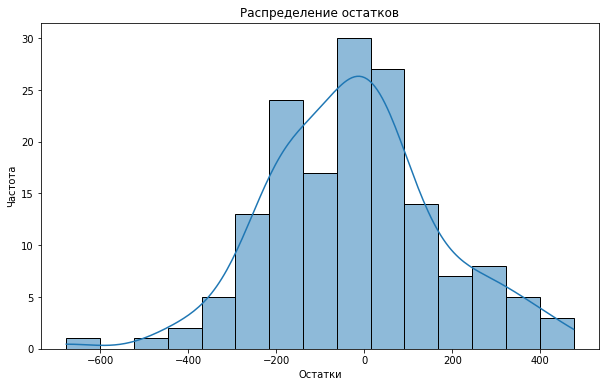

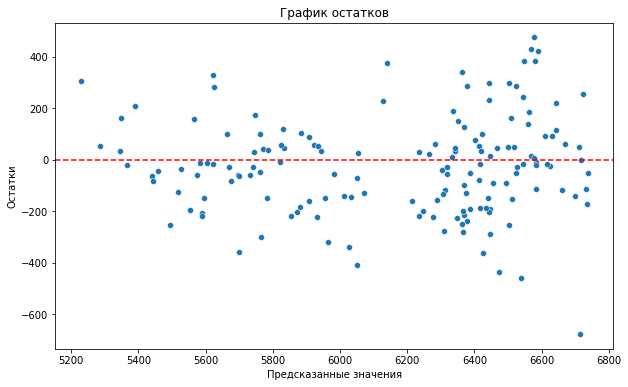

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_lr2, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

**R2 увеличился и теперь его значение 0.81**

## Обучение третьей модели линейной регрессии 

In [80]:
df = ferma_main.copy()

# Преобразование СПО в категориальный признак
df.loc[df['СПО'] < 0.92, 'СПО'] = 0
df.loc[df['СПО'] >= 0.92, 'СПО'] = 1

# Добавление квадрата ЭКЕ
df['ЭКЕ'] = df['ЭКЕ'] ** 2

In [81]:
ferma_dad.head()

,id,Имя Папы
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


In [82]:
# Объединяем датафреймы
df = pd.merge(left=df, right=ferma_dad, how='inner', left_on='id', right_on='id')


In [83]:
df.head()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,201.64,1743,0.0,висбикайдиал,равнинное,айдиал,3.58,3.076,вкусно,более2лет,буйный
1,2,5529,163.84,2138,0.0,висбикайдиал,равнинное,соверин,3.54,3.079,вкусно,менее2лет,соловчик
2,3,5810,196.00,1854,0.0,рефлешнсоверинг,холмистое,соверин,3.59,3.074,невкусно,более2лет,барин
3,4,5895,153.76,2012,0.0,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,невкусно,более2лет,буйный
4,5,5302,163.84,1675,0.0,висбикайдиал,равнинное,соверин,3.73,3.073,вкусно,менее2лет,барин


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   Удой, кг          628 non-null    int64  
 2   ЭКЕ               628 non-null    float64
 3   Сырой протеин, г  628 non-null    int64  
 4   СПО               628 non-null    float64
 5   Порода            628 non-null    object 
 6   Тип пастбища      628 non-null    object 
 7   порода папы_быка  628 non-null    object 
 8   Жирность,%        628 non-null    float64
 9   Белок,%           628 non-null    float64
 10  Вкус молока       628 non-null    object 
 11  Возраст           628 non-null    object 
 12  Имя Папы          628 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.7+ KB


In [85]:
RANDOM_STATE = 42

X = df.drop('Удой, кг', axis=1)
y = df['Удой, кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

In [86]:
num_cols= ['ЭКЕ', 'Сырой протеин, г']
cat_cols= ['Порода', 'Тип пастбища', 'порода папы_быка', 'СПО', 'Имя Папы', 'Возраст']

In [87]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols])
X_test_ohe = encoder.transform(X_test[cat_cols])

encoder_cols = encoder.get_feature_names_out()
encoder_cols

array(['Порода_рефлешнсоверинг', 'Тип пастбища_холмистое',
       'порода папы_быка_соверин', 'СПО_1.0', 'Имя Папы_буйный',
       'Имя Папы_геркулес', 'Имя Папы_соловчик', 'Возраст_менее2лет'],
      dtype=object)

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [89]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_cols)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_cols)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [90]:
model_lr3 = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions_lr3 = model_lr3.predict(X_test)

In [91]:
r2_3 = r2_score(y_test, predictions_lr3)
r2_3

0.8247542745210408

In [92]:
# Оценка третей модели
mse_3, mae_3, rmse_3 = calculate_metrics(y_test, predictions_lr3)
print_metrics("Model 3", mse_3, mae_3, rmse_3)

Model 3 - MSE: 35673.89, MAE: 146.16, RMSE: 188.88


In [93]:
residuals = y_test - predictions_lr2

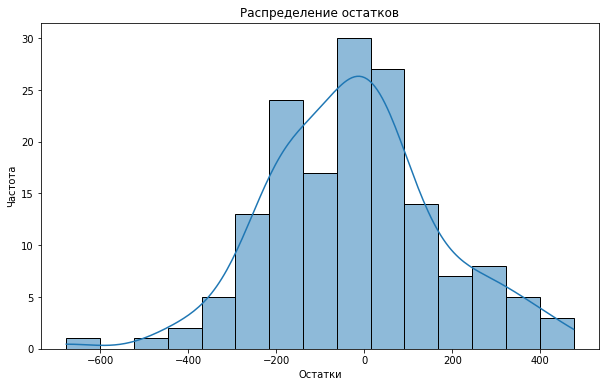

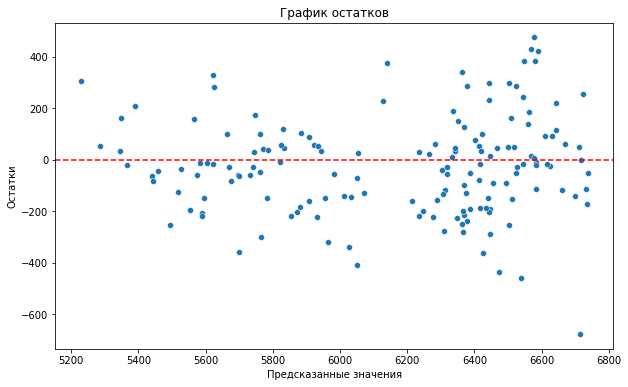

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_lr2, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

In [95]:
# Для точного прогноза используем верхнюю границу доверительного интервала, то есть 6221 кг
print('95% доверительный интервал =', st.norm.interval(0.95, loc=np.mean(predictions_lr3), scale=st.sem(predictions_lr3)))

95% доверительный интервал = (6092.340075854288, 6221.3750700583805)


**Третья модель лучшеая среди трех моделей. В среднем она ошибается на 188 кг удоя при прогнозировании. Используя верхнюю границу доверительного интервала, можно сделать более уверенный прогноз удоя.**

In [96]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_белок,%",Возраст
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет


In [97]:
df.head()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,201.64,1743,0.0,висбикайдиал,равнинное,айдиал,3.58,3.076,вкусно,более2лет,буйный
1,2,5529,163.84,2138,0.0,висбикайдиал,равнинное,соверин,3.54,3.079,вкусно,менее2лет,соловчик
2,3,5810,196.00,1854,0.0,рефлешнсоверинг,холмистое,соверин,3.59,3.074,невкусно,более2лет,барин
3,4,5895,153.76,2012,0.0,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,невкусно,более2лет,буйный
4,5,5302,163.84,1675,0.0,висбикайдиал,равнинное,соверин,3.73,3.073,вкусно,менее2лет,барин


In [98]:
cow_buy_copy = cow_buy.copy()

In [99]:
df.describe(include = 'object')

,Порода,Тип пастбища,порода папы_быка,Вкус молока,Возраст,Имя Папы
count,628,628,628,628,628,628
unique,2,2,2,2,2,4
top,висбикайдиал,холмистое,айдиал,вкусно,более2лет,барин
freq,372,350,317,370,518,240


In [100]:
cow_buy_copy['ЭКЕ'] = df['ЭКЕ'].mean()*1.05
cow_buy_copy['СПО'] = df['СПО'].mean()*1.05
cow_buy_copy['Сырой протеин, г'] = df['Сырой протеин, г'].mean()*1.05

In [101]:
df['ЭКЕ'].mean()

213.35735668789806

In [102]:
cow_buy_copy['ЭКЕ']

0     224.025225
1     224.025225
2     224.025225
3     224.025225
4     224.025225
5     224.025225
6     224.025225
7     224.025225
8     224.025225
9     224.025225
10    224.025225
11    224.025225
12    224.025225
13    224.025225
14    224.025225
15    224.025225
Name: ЭКЕ, dtype: float64

In [103]:
cow_buy_copy.loc[df['СПО'] < 0.92, 'СПО'] = 0
cow_buy_copy.loc[df['СПО'] >= 0.92, 'СПО'] = 1

In [104]:
num_cols = ['ЭКЕ', 'Сырой протеин, г']
cat_cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'СПО', 'Имя_папы', 'Возраст']

In [105]:
cow_buy_copy_ohe = encoder.transform(cow_buy_copy[cat_cols])

encoder_cols = encoder.get_feature_names_out()
encoder_cols

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Имя_папы
Feature names seen at fit time, yet now missing:
- Имя Папы

  warnings.warn(message, FutureWarning)


array(['Порода_рефлешнсоверинг', 'Тип пастбища_холмистое',
       'порода папы_быка_соверин', 'СПО_1.0', 'Имя Папы_буйный',
       'Имя Папы_геркулес', 'Имя Папы_соловчик', 'Возраст_менее2лет'],
      dtype=object)

In [106]:
cow_buy_new_scaled = scaler.transform(cow_buy_copy[num_cols])

In [107]:
# Обьединяем
X_test_ohe = pd.DataFrame(cow_buy_copy_ohe, columns=encoder_cols)
X_test_scaled = pd.DataFrame(cow_buy_new_scaled, columns=num_cols)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [108]:
predictions_cow_buy_copy_scaled = model_lr3.predict(X_test)
predictions_cow_buy_copy_scaled

array([6215.76311421, 5984.55484576, 5889.84359272, 6198.93319394,
       6147.98988373, 6031.22403499, 6177.10355451, 6360.16431414,
       6304.33150611, 6223.77274374, 6215.76311421, 6087.09838866,
       6552.71302289, 6304.33150611, 6385.00386394, 6530.88338347])

In [109]:
result = cow_buy.copy()
result['Удой, кг'] = predictions_cow_buy_copy_scaled
result

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_белок,%",Возраст,"Удой, кг"
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6215.763114
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет,5984.554846
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,5889.843593
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет,6198.933194
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет,6147.989884
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее2лет,6031.224035
6,висбикайдиал,равнинное,соверин,буйный,3.57,3.079,более2лет,6177.103555
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее2лет,6360.164314
8,висбикайдиал,холмистое,соверин,соловчик,3.73,3.055,более2лет,6304.331506
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более2лет,6223.772744


**Учитывая, что цель отобрать коров с удоям не меньше 6221 кг, получается только 7 коров подходят по этому критерию.**

## Обучение модели логистической регрессии

In [110]:
df = ferma_main.copy()
df.head()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,висбикайдиал,равнинное,айдиал,3.58,3.076,вкусно,более2лет
1,2,5529,12.8,2138,0.890,висбикайдиал,равнинное,соверин,3.54,3.079,вкусно,менее2лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,невкусно,более2лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,невкусно,более2лет
4,5,5302,12.8,1675,0.885,висбикайдиал,равнинное,соверин,3.73,3.073,вкусно,менее2лет


In [111]:
df.loc[df['СПО']<0.92, ['СПО']] = 0
df.loc[df['СПО']>=0.92, ['СПО']] = 1


In [112]:
df['Вкус молока'] = df['Вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0).astype(float)

In [113]:
df.head()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.0,висбикайдиал,равнинное,айдиал,3.58,3.076,1.0,более2лет
1,2,5529,12.8,2138,0.0,висбикайдиал,равнинное,соверин,3.54,3.079,1.0,менее2лет
2,3,5810,14.0,1854,0.0,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0.0,более2лет
3,4,5895,12.4,2012,0.0,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0.0,более2лет
4,5,5302,12.8,1675,0.0,висбикайдиал,равнинное,соверин,3.73,3.073,1.0,менее2лет


In [114]:
df = pd.merge(left=df, right=ferma_dad, how='inner', left_on='id', right_on='id')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   Удой, кг          628 non-null    int64  
 2   ЭКЕ               628 non-null    float64
 3   Сырой протеин, г  628 non-null    int64  
 4   СПО               628 non-null    float64
 5   Порода            628 non-null    object 
 6   Тип пастбища      628 non-null    object 
 7   порода папы_быка  628 non-null    object 
 8   Жирность,%        628 non-null    float64
 9   Белок,%           628 non-null    float64
 10  Вкус молока       628 non-null    float64
 11  Возраст           628 non-null    object 
 12  Имя Папы          628 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 68.7+ KB


In [116]:
df.head()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,14.2,1743,0.0,висбикайдиал,равнинное,айдиал,3.58,3.076,1.0,более2лет,буйный
1,2,5529,12.8,2138,0.0,висбикайдиал,равнинное,соверин,3.54,3.079,1.0,менее2лет,соловчик
2,3,5810,14.0,1854,0.0,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0.0,более2лет,барин
3,4,5895,12.4,2012,0.0,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0.0,более2лет,буйный
4,5,5302,12.8,1675,0.0,висбикайдиал,равнинное,соверин,3.73,3.073,1.0,менее2лет,барин


In [117]:
RANDOM_STATE = 42

X = df.drop('Вкус молока', axis=1)
y = df['Вкус молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

In [118]:
num_cols = ['ЭКЕ', 'Сырой протеин, г', 'Жирность,%', 'Белок,%']
cat_cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'СПО', 'Имя Папы', 'Возраст']

In [119]:
#категориальные
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols])
X_test_ohe = encoder.transform(X_test[cat_cols])

encoder_cols = encoder.get_feature_names_out()
encoder_cols

array(['Порода_рефлешнсоверинг', 'Тип пастбища_холмистое',
       'порода папы_быка_соверин', 'СПО_1.0', 'Имя Папы_буйный',
       'Имя Папы_геркулес', 'Имя Папы_соловчик', 'Возраст_менее2лет'],
      dtype=object)

In [120]:
#количественные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [121]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_cols)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_cols)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [122]:
display(y_train)

507    1.0
382    1.0
586    0.0
196    1.0
327    1.0
      ... 
71     1.0
106    1.0
270    1.0
435    0.0
102    0.0
Name: Вкус молока, Length: 471, dtype: float64

In [123]:
# обучяем модель и получяем предсказания на тестовых данных
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [124]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)

In [125]:
print('accuracy: ',round(acc ,2))
print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))

accuracy:  0.63
recall:  0.62
precision:  0.86


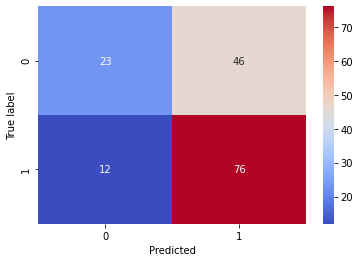

In [126]:
# Создаем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Исходя из этой матрицы можно сделать выводы:

23 — количество истинно отрицательных TN: модель правильно предсказала, что в 23 случаях молоко окажется не вкусным.

46 — количество ложно положительных FP: модель ошибочно предсказала, что в 46 случаях молоко будет вкусным, хотя на самом деле не вкусным.

12 — количество ложно отрицательных FN: модель ошибочно предсказала, что в 12 случаях молоко будет не вкусным, хотя на самом деле вкусное.

76 — количество истинно положительных TP: модель правильно предсказала, что 76 случаях молоко будет вкусным.


**Учитывая условия, фермеру важно, чтобы молоко было вкусным, поэтому наиболее критичными являются ошибки первого рода. Метрика precision, которая отвечает за минимизацию таких ошибок, у нас достаточно высока — 86%.**

In [127]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head())

     y_valid   y_proba
85       1.0  0.855926
51       1.0  0.842432
66       1.0  0.839103
110      1.0  0.835965
147      1.0  0.812657


In [128]:
thresholds = [round(i,2) for i in np.linspace(0.65, 0.85,num = 20,endpoint=False)]
print(thresholds) 

[0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84]


In [129]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0 )


In [130]:
threshold = []
threshold = pd.DataFrame(columns=['Порог', 'Precision'])

rw = 0
for i in data.columns[2:]:
    precision = precision_score(data['y_valid'],data[i])
    threshold.loc[rw] = [i, precision]
    rw = rw+1
threshold

,Порог,Precision
0,y_pred_0.65,0.761905
1,y_pred_0.66,0.758065
2,y_pred_0.67,0.785714
3,y_pred_0.68,0.773585
4,y_pred_0.69,0.816327
5,y_pred_0.7,0.840909
6,y_pred_0.71,0.820513
7,y_pred_0.72,0.837838
8,y_pred_0.73,0.833333
9,y_pred_0.74,0.888889


**Исходя из таблицы, оптимальный порог равен 0.8, при котором минимизируются ошибки первого рода.**
**Теперь нам надо спрогнозировать вкус молока у покупаемых коров, при этом задать полученный порог.**

In [131]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_белок,%",Возраст
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет


In [132]:
df.head()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,14.2,1743,0.0,висбикайдиал,равнинное,айдиал,3.58,3.076,1.0,более2лет,буйный
1,2,5529,12.8,2138,0.0,висбикайдиал,равнинное,соверин,3.54,3.079,1.0,менее2лет,соловчик
2,3,5810,14.0,1854,0.0,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0.0,более2лет,барин
3,4,5895,12.4,2012,0.0,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0.0,более2лет,буйный
4,5,5302,12.8,1675,0.0,висбикайдиал,равнинное,соверин,3.73,3.073,1.0,менее2лет,барин


In [133]:
cow_buy_copy = cow_buy.copy()

In [134]:
df.describe(include=[object])

,Порода,Тип пастбища,порода папы_быка,Возраст,Имя Папы
count,628,628,628,628,628
unique,2,2,2,2,4
top,висбикайдиал,холмистое,айдиал,более2лет,барин
freq,372,350,317,518,240


In [135]:
df.describe()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,"Жирность,%","Белок,%",Вкус молока
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.589172,3.604268,3.075670,0.589172
std,181.475367,475.857053,1.301777,182.832816,0.492376,0.168093,0.002551,0.492376
min,1.000000,5204.000000,10.900000,1660.000000,0.000000,2.990000,3.069000,0.000000
25%,158.750000,5749.750000,13.500000,1771.750000,0.000000,3.590000,3.074000,0.000000
50%,315.500000,6132.500000,14.700000,1888.000000,1.000000,3.650000,3.076000,1.000000
75%,472.250000,6501.000000,15.600000,2062.250000,1.000000,3.720000,3.077000,1.000000
max,629.000000,7222.000000,16.800000,2349.000000,1.000000,3.750000,3.085000,1.000000


In [136]:
cow_buy_copy['ЭКЕ'] = df['ЭКЕ'].mean()*1.05
cow_buy_copy['СПО'] = df['СПО'].mean()*1.05
cow_buy_copy['Сырой протеин, г'] = df['Сырой протеин, г'].mean()*1.05

In [137]:
cow_buy_copy.loc[df['СПО']<0.92, ['СПО']] = 0
cow_buy_copy.loc[df['СПО']>=0.92, ['СПО']] = 1

In [138]:
cow_buy_copy.describe()

,"Текущая_жирность,%","Текущий_белок,%",ЭКЕ,СПО,"Сырой протеин, г"
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,3.571875,3.068250,15.276162,0.437500,2019.947532
std,0.141620,0.011264,0.000000,0.512348,0.000000
min,3.340000,3.046000,15.276162,0.000000,2019.947532
25%,3.415000,3.059500,15.276162,0.000000,2019.947532
50%,3.585000,3.073500,15.276162,0.000000,2019.947532
75%,3.692500,3.076750,15.276162,1.000000,2019.947532
max,3.770000,3.081000,15.276162,1.000000,2019.947532


In [139]:
cat_cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'СПО', 'Имя_папы', 'Возраст']
num_cols = ['ЭКЕ', 'Сырой протеин, г', 'Текущая_жирность,%', 'Текущий_белок,%']

In [140]:
#категориальные данные

cow_buy_copy_ohe = encoder.transform(cow_buy_copy[cat_cols])


encoder_cols = encoder.get_feature_names_out()
encoder_cols

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Имя_папы
Feature names seen at fit time, yet now missing:
- Имя Папы

  warnings.warn(message, FutureWarning)


array(['Порода_рефлешнсоверинг', 'Тип пастбища_холмистое',
       'порода папы_быка_соверин', 'СПО_1.0', 'Имя Папы_буйный',
       'Имя Папы_геркулес', 'Имя Папы_соловчик', 'Возраст_менее2лет'],
      dtype=object)

In [141]:
#количественные данные

cow_buy_copy_scaled = scaler.transform(cow_buy_copy[num_cols])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Текущая_жирность,%
- Текущий_белок,%
Feature names seen at fit time, yet now missing:
- Белок,%
- Жирность,%

  warnings.warn(message, FutureWarning)


In [142]:
X_test_ohe = pd.DataFrame(cow_buy_copy_ohe, columns=encoder_cols)
X_test_scaled = pd.DataFrame(cow_buy_copy_scaled, columns=num_cols)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [143]:
# Предсказания
predictions_cow_buy_copy_scaled = clf.predict_proba(X_test)[:,1] > 0.8
predictions_cow_buy_copy_scaled  = ['Вкусное' if x==True else 'Не вкусное' for x in predictions_cow_buy_copy_scaled]
predictions_cow_buy_copy_scaled

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Текущая_жирность,%
- Текущий_белок,%
Feature names seen at fit time, yet now missing:
- Белок,%
- Жирность,%

  warnings.warn(message, FutureWarning)


['Вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное']

## Итоговые выводы

In [144]:
result['Вкус'] = predictions_cow_buy_copy_scaled
result

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_белок,%",Возраст,"Удой, кг",Вкус
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6215.763114,Вкусное
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет,5984.554846,Не вкусное
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,5889.843593,Не вкусное
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет,6198.933194,Не вкусное
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет,6147.989884,Не вкусное
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее2лет,6031.224035,Не вкусное
6,висбикайдиал,равнинное,соверин,буйный,3.57,3.079,более2лет,6177.103555,Не вкусное
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее2лет,6360.164314,Не вкусное
8,висбикайдиал,холмистое,соверин,соловчик,3.73,3.055,более2лет,6304.331506,Не вкусное
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более2лет,6223.772744,Не вкусное


In [145]:
result[(result['Удой, кг'] >= 6221)&(result['Вкус'] != 'Не вкусное')]

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_белок,%",Возраст,"Удой, кг",Вкус


## Итоговый вывод

**Получается, нет коров, которые бы удовлетворяли одновременно двум параметрам (удой больше 6221 кг и вкусное молоко).**

**Предобработка данных:**

**На первом этапе была осуществлена предобработка данных:**

- **Проверены пропуски в таблицах, и таковых обнаружено не было.**

- **Преобразован тип данных в столбцах 'ЭКЕ', 'СПО', 'Текущая_жирность,%', 'Текущий_белок,%' на числовой формат.**

- **В данных были удалены не нужные спецсимволы.**

- **Удалены дубликаты: 5 строк из данных по фермерскому стаду и 4 — по покупаемому.**

**Статистический анализ данных**

**На втором этапе был проведен статистический анализ данных:**

- **Выявлены выбросы в данных по распределению удоя, которые были удалены. Также было выявлено:**

- **Белок никак не связан с удоем.**

- **ЭКЕ имеет сильную и относительно линейную связь с удоем.**

- **Протеин имеет слабую и нелинейную зависимость с целевой переменной.**

- **Жирность и СПО имеют нелинейную зависимость, так как их распределения не нормальные.**

**Выбор признаков для модели:**

**По результатам предварительного анализа было определено, что для построения модели целесообразно использовать следующие признаки:**|

- **Исключить параметр Белок, так как связи с целевой переменной практически нет.**

- **Исключить параметр Вкус молока, так как в данных по покупаемому стаду нет такого признака.**

- **Включить параметры ЭКЕ, Протеин, а также категориальные признаки: Порода, тип пастбища, СПО, порода папы_быка и возраст.**

**Модель линейной регрессии:**

- **Среди трех моделей линейной регрессий для прогнозирования удоя была отобрана третья модель линейной регрессии, в которую был добавлен параметр СПО, преобразованный в категориальный признак.**

- **Параметр ЭКЕ был возведен в квадрат.**

- **Коэффициент R2_score линейной регрессии составил 0.82.**
- **Остатки регрессии распределены нормально и практически без смещений.**
- **Доверительный интервал полученных прогнозов (95%): удои находятся в диапазоне от 6092.34 до 6221.37 кг.**

**Логистическая регрессия:**

**Была также построена логистическая регрессия для прогнозирования вкуса молока:**

- **В процессе калибровки был определен порог в размере 0.8, который сводит к минимуму ошибки первого рода.**

**В данном проекте возможно улучшить результаты регрессионной модели следующими способами:**

**1. Добавление новых признаков:**

- **Включить дополнительные признаки, которые могут влиять на целевую переменную.**

**2. Использование более сложных моделей:**

**В данном проекте используется линейная и логистическая регрессия. Возможно использование более сложных моделей могут улучшить качество предсказаний.**

**При анализе рисков или экономических расчётов важны следующие метрики моделей классификации, в том числе логистической регрессии:**

**Accuracy (точность):**

- **Доля правильно предсказанных значений от общего числа предсказаний. Эта метрика важна, но не всегда является самой информативной.**

**Precision (точность предсказания класса 1):**

- **Доля истинно положительных предсказаний среди всех положительных предсказаний. В контексте экономических расчётов и анализа рисков эта метрика важна, так как показывает, насколько часто модель ошибается, предсказывая позитивный исход. Высокая точность важна для минимизации ложных срабатываний, что может быть критично в сценариях, где ложные срабатывания могут дорого стоить.**

**Recall (полнота):**

- **Доля истинно положительных предсказаний среди всех истинно положительных значений. Эта метрика важна для оценки того, как хорошо модель распознаёт все положительные случаи. В некоторых экономических и риск-ориентированных сценариях высокая полнота может быть важна для того, чтобы не пропустить ни одного случая.**

**Confusion Matrix (матрица ошибок):**

- **Матрица ошибок даёт полный обзор о количестве верных и ошибочных предсказаний для каждого класса, что позволяет более детально анализировать ошибки модели и принимать соответствующие меры.**

**Итог:**

**По итогу построений линейной и логистической регрессии мы выявили, что в покупаемом стаде нет коров, которые дают одновременно приемлемый уровень удоя, а это не менее 6221 кг и вкусное молоко.**